In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
        
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))
    
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)

In [5]:
print(len(data))
data10000000=data[:10000000]
print(len(data10000000))

24089000
10000000


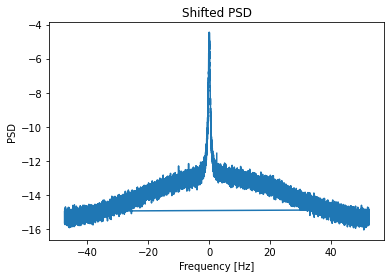

In [6]:
#Find and plot PSD 
fall, Pxx_all = signal.welch(data10000000-np.mean(data10000000), 100, nperseg=(10000000/256), return_onesided=False, detrend=None, scaling='density', window='hanning')
#plt.semilogy(fall, Pxx_all)
#plt.title('PSD using Welchs Method')
#plt.xlabel('frequency')
#plt.ylabel('PSD')
#plt.show()

#shift the peak to zero before putting into calibration eqs
maxindex=np.argmax(Pxx_all)
shift=fall[maxindex]
fallshift=fall+abs(shift)

#plt.semilogy(fallshift, Pxx_all)
plt.plot(fallshift,10*np.log10(Pxx_all))
plt.title('Shifted PSD')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

In [7]:
#displacement noise equation from GW Summary 
#Su(omega) =(1/k i omega)^2 * 1/Z^2 * Sv(omega)
#omega=2pi f

#SQUID transimpedance 
Zsquid= 1.2e6

#spectral density of voltage noise output by SQUID - convert Sv(f) to Sv(omega)=Sv here
#hasn't been done in SS try without
Sv= Pxx_all

#electromechanical coupling constant (from Will's code kappa2)
ksquared= (0.000619449)**2

#omega frequency axis, add mode freq and convert from Hz to rad/s, and create squared axis 
omega= [(x+5.505e6)*(2*np.pi) for x in fallshift]
omegasq= [x**2 for x in omega]

#multiply 1/omega^2 list and Sv 
product= [(1/a) * b for a, b in zip(omegasq, Sv)]
 
#put into equation for Su(omega)
#note: 1/i^2 makes constants negative but haven't entered this here
#10^-6 squared is a conversion from micro V to V
constants = (1/ksquared)*(1/(Zsquid**2)*(10**(-6))**2)
Su = [x*(constants) for x in product]

Text(0, 0.5, 'Su')

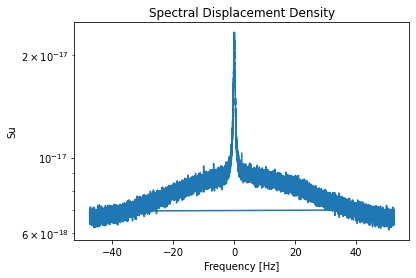

In [8]:
#plot 
#plt.plot(fallshift, np.sqrt(Su))
#plt.xscale('log')
#plt.yscale('log')

plt.semilogy(fallshift, np.sqrt(Su))
plt.title('Spectral Displacement Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Su')

In [10]:
#f, Pxx = signal.welch(col1[:10000000]-np.mean(col1[:10000000]), 100, nperseg=(10000000/256), return_onesided=False, detrend=None, scaling='density', window='hanning')
#plt.plot(fallshift,10*np.log10(Pxx))
#plt.title('Column 1 PSD')
#plt.xlabel('Frequency [Hz]')
#plt.ylabel('PSD')
#plt.show()